# **Image Classification using CNN**

We want to create a **CNN model** that can identify if an image is related to the following **13 subcategories**:  
- **Topwear, Bottomwear, Innerwear, Bags, Watches, Jewellery, Eyewear, Wallets, Shoes, Sandal, Makeup, Fragrance, Others.**  

Our **[Kaggle dataset](https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-small)** contains **44,441 fashion product images**

Metadata (images' ID, label, productDisplayName) are in styles.csv.

## **Step 1: Data Exploration**

### **Step 1.1: Get Kaggle API Token**
Before downloading from Kaggle, you need to authenticate using the Kaggle API key.

1. Go to [Kaggle](https://www.kaggle.com/).
2. Click on your **profile picture** (top right).
3. Select **Account**.
4. Scroll down to **API** → Click **Create New API Token**.
5. This will download a file called **kaggle.json**.

In [1]:
!ls /

bin			    kaggle		      opt		 sys
boot			    lib			      proc		 tmp
content			    lib32		      python-apt	 tools
cuda-keyring_1.1-1_all.deb  lib64		      python-apt.tar.xz  usr
datalab			    libx32		      root		 var
dev			    media		      run
etc			    mnt			      sbin
home			    NGC-DL-CONTAINER-LICENSE  srv


In [2]:
!ls /content

sample_data


In [3]:
!rm -rf /content/content/fashion-product-images-small.zip

In [4]:
!ls /content/sample_data

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [5]:
from google.colab import files
files.upload()
# This step only uploads the Kaggle API key and does not download the dataset yet. It simply enables authentication for Kaggle in Colab.

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ryanmokarian","key":"4d82d468f446c7f186e8e9ad2b18aac7"}'}

In [ ]:
import os
import shutil

# Create a hidden directory for Kaggle API key
os.makedirs("/root/.kaggle/", exist_ok=True)

# Move the kaggle.json file to this directory
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

# Set permissions to prevent unauthorized access
os.chmod("/root/.kaggle/kaggle.json", 600)

print("Kaggle API key configured successfully!")

Kaggle API key configured successfully!


Download the dataset

In [ ]:
!kaggle datasets download -d paramaggarwal/fashion-product-images-small
# the dataset will be downloaded to /content in Colab.
# Colab provides a temporary VM, meaning files in /content/ will be lost after a session reset.
# To keep your dataset, save it to Google Drive:

# from google.colab import drive
# drive.mount('/content/drive')

# # Copy dataset to Google Drive (change the path if needed)
# !cp -r /content/content/drive/My\ Drive/

# Later, you can reload it from Google Drive without redownloading from Kaggle:

# !cp -r /content/drive/My\ Drive/content/

Dataset URL: https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-small
License(s): MIT
 99% 560M/565M [00:14<00:00, 37.9MB/s]
100% 565M/565M [00:14<00:00, 41.3MB/s]


In [ ]:
!unzip fashion-product-images-small.zip -d /content/

In [ ]:
# !df -h /content
!ls /content

fashion-product-images-small.zip  images  myntradataset  sample_data  styles.csv


In [ ]:
!rm -rf /content/train /content/test /content/validation

In [ ]:
import os

# Path where the dataset is extracted
dataset_path = "/content"

# Check files
print("Files in dataset folder:", os.listdir(dataset_path))

Files in dataset folder: ['.config', 'fashion-product-images-small.zip', 'myntradataset', 'styles.csv', 'images', 'sample_data']


Mount Google Drive in Colab

In [ ]:
!ls /
# !ls /content/drive/My\ Drive/

bin			    dev     lib32   NGC-DL-CONTAINER-LICENSE  root  tmp
boot			    etc     lib64   opt			      run   tools
content			    home    libx32  proc		      sbin  usr
cuda-keyring_1.1-1_all.deb  kaggle  media   python-apt		      srv   var
datalab			    lib     mnt     python-apt.tar.xz	      sys


In [ ]:
# print(os.listdir("/content/fmyntradataset"))

In [ ]:
print(os.listdir("/content/f/images"))

In [ ]:
print(os.listdir("/content/myntradataset/images"))

In [ ]:
import shutil

# Path to the folder you want to delete
folder_to_delete = "/content/myntradataset"

# Delete the folder and its contents
shutil.rmtree(folder_to_delete)

# Verify deletion
print("Deleted:", folder_to_delete)

Deleted: /content/myntradataset


### Step 1.2: Picking a Random Image and Printing Its Shape


In [ ]:
!rm -rf /content/fashion-product-images-small.zip

In [ ]:
!ls /content

fashion-product-images-small.zip  images  sample_data  styles.csv


In [ ]:
#!ls /content/images

<ipython-input-8-9d826e89bced>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  pic = imageio.imread(pic_path)


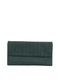

Original height, width, and channels of the image: 80 60 3


In [ ]:
import imageio
import os
import random
from google.colab.patches import cv2_imshow
import cv2

# Set a random seed for reproducibility
random.seed(12345)

# Define the image folder
image_folder = "/content/images"

# Pick a random image
random_pic_file = random.choice(os.listdir(image_folder))
pic_path = os.path.join(image_folder, random_pic_file)

# Load image
pic = imageio.imread(pic_path)

# Show image
cv2_imshow(pic)

# Print shape
height, width, channels = pic.shape
print(f'Original height, width, and channels of the image: {height} {width} {channels}') # 80 60 3
# The image is 80 pixels tall and 60 pixels wide. Standard size is 128x128.
# 3 is number of colors (RGB) and it means it is a colored image (not grayscale).

### Step 1.3: Create a dictionary of images-labels
- First Convert subCategory to 13 subcategories: Topwear, Bottomwear,
Innerwear, Bags, Watches, Jewellery, Eyewear, Wallets, Shoes, Sandal, Makeup,
Fragrance, Others.
- Then test the label for the random_pic_file (21210.ipg)
- Create a dictionary of images and their respective labels  

In [ ]:
!ls /content

fashion-product-images-small.zip  images  sample_data  styles.csv


### Step 1.4: Splitting the Dataset into Train, Validation, and Test Sets

- In case train.csv and test.csv data wants to be uploaded in google drive and mounted

In [ ]:
# import pandas as pd
# from google.colab import drive

# # Step 1: Mount Google Drive
# drive.mount('/content/drive')

# # Step 2: Define the correct file path based on your folder structure
# file_path = "/content/drive/My Drive/Data_to_mount/Sidhardh/assignment2/test.csv"

# # Step 3: Read the CSV file, assuming tab-separated values
# df_teacher_test = pd.read_csv(file_path, delimiter="\t", header=0, names=["imageid", "label", "productname"])

# # # Step 4: Display the DataFrame
# # import ace_tools as tools
# # tools.display_dataframe_to_user(name="Parsed DataFrame", dataframe=df)

In [ ]:

import os
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from PIL import Image
import glob

# Define dataset paths
dataset_path = "/content/images"
csv_path = "/content/styles.csv"

train_path = "/content/train"
val_path = "/content/validation"
test_path = "/content/test"

# Create directories
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Load styles.csv and create a label column
df = pd.read_csv(csv_path, usecols=["id", "subCategory", "productDisplayName"])

# Define the 12 known categories
known_categories = [
    "Topwear", "Bottomwear", "Innerwear", "Bags", "Watches",
    "Jewellery", "Eyewear", "Wallets", "Shoes", "Sandal",
    "Makeup", "Fragrance"
]

# Step 1: Map all subcategories outside of the 12 categories to "Other"
df["label"] = df["subCategory"].apply(lambda x: x if x in known_categories else "Other")

# Step 2: Create a mapping dictionary (category to integer)
category_mapping = {category: idx for idx, category in enumerate(known_categories + ["Other"])}

# Step 3: Convert labels to numerical values
df["label"] = df["label"].map(category_mapping)

# Create an id-to-label dictionary
id_to_label = dict(zip(df["id"].astype(str), df["label"]))

# Get list of image files
all_images = os.listdir(dataset_path)

# Split into train (80%), validation (10%), test (10%)
train_files, test_val_files = train_test_split(all_images, test_size=0.2, random_state=42)
val_files, test_files = train_test_split(test_val_files, test_size=0.5, random_state=42)

# Copy files to respective directories
for file in train_files:
    shutil.copy(os.path.join(dataset_path, file), os.path.join(train_path, file))

for file in val_files:
    shutil.copy(os.path.join(dataset_path, file), os.path.join(val_path, file))

for file in test_files:
    shutil.copy(os.path.join(dataset_path, file), os.path.join(test_path, file))

print("Dataset split complete! Train, validation, and test sets created.")
print("Category Mapping:", category_mapping)
print("Sample of id_to_label:", list(id_to_label.items())[:5])  # Show sample mapping


Dataset split complete! Train, validation, and test sets created.
Category Mapping: {'Topwear': 0, 'Bottomwear': 1, 'Innerwear': 2, 'Bags': 3, 'Watches': 4, 'Jewellery': 5, 'Eyewear': 6, 'Wallets': 7, 'Shoes': 8, 'Sandal': 9, 'Makeup': 10, 'Fragrance': 11, 'Other': 12}
Sample of id_to_label: [('15970', 0), ('39386', 1), ('59263', 4), ('21379', 1), ('53759', 0)]


In [ ]:
df.head()

,id,subCategory,productDisplayName,label
0,15970,Topwear,Turtle Check Men Navy Blue Shirt,0
1,39386,Bottomwear,Peter England Men Party Blue Jeans,1
2,59263,Watches,Titan Women Silver Watch,4
3,21379,Bottomwear,Manchester United Men Solid Black Track Pants,1
4,53759,Topwear,Puma Men Grey T-shirt,0


In [ ]:
df.shape

(44446, 4)

In [ ]:
# label_dict["29114"]
id_to_label["29114"] # 29114 subCategory is Socks -> label: Other -> label id: 12

12

In [ ]:
!ls /content

fashion-product-images-small.zip  images  sample_data  styles.csv  test  train	validation


In [ ]:
import os
# print(os.listdir("/content")) # ['train', 'styles.csv', 'images', 'validation', 'test']
print(os.listdir("/content/test"))

In [ ]:
test_path = "/content/test"
print(len(os.listdir(test_path))) # 4445

4445


### Step 1.5: Count the Number of Images in Each Dataset

In [ ]:
import glob

# Define dataset directories
folder_path_options = [train_path, val_path, test_path]

for path in folder_path_options:
    files = glob.glob(path + "/*")
    file_count = len(files)
    print(f'There are {file_count} images in the folder at {path}')

There are 35552 images in the folder at /content/train
There are 4444 images in the folder at /content/validation
There are 4445 images in the folder at /content/test


# **Step 2: Data Loader for Fashion Image Dataset**
In this step, we will:
1. **Define preprocessing functions** (image transformations).
2. **Create a custom PyTorch dataset class** to load images.

---

## **Why Do We Need a Data Loader?**
- **Efficient Data Loading:** PyTorch requires an efficient way to read images in batches during training.
- **Image Preprocessing:** Resize images, normalize, and apply transformations (e.g., flipping, cropping).
- **Memory Optimization:** Loading images dynamically instead of keeping everything in memory.
- **Integration with Neural Network:** The DataLoader will provide images **to the CNN model** during training and inference.

---

### **Step 2.1: Define Image Preprocessing Pipeline**
We will use **torchvision.transforms** to:
- **Resize** images to `(128, 128)`.
- **Convert them into tensors** for PyTorch compatibility.
- **Normalize the pixel values** to improve convergence.

---

In [ ]:
import torchvision.transforms as transforms

# Define transformations
train_transforms = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to 128x128
    transforms.RandomHorizontalFlip(),  # Augment data with horizontal flips
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize pixel values
])

# Validation and test transformations (no augmentation)
val_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

test_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

Why Normalize?

Normalization helps improve model training by making pixel values range between -1 to 1 instead of 0 to 255.
This makes the model converge faster.

---

### **Step 2.2: Create a Custom PyTorch Dataset Class**
We now define a dataset class to **load images dynamically**.

✅ **Why Do We Need This Custom Dataset?**
- **Handles image loading dynamically** without keeping everything in memory.
- **Applies transformations automatically** when an image is loaded.
- **Extracts labels from filenames**, assuming files are named like `"5_abc123.jpg"` (where `5` is the class label).

---

In [ ]:
from torch.utils.data import Dataset
import os
from PIL import Image

# Define the FashionDataset class
class FashionDataset(Dataset):
    def __init__(self, path, label_dict, transform=None):
        self.path = path
        self.label_dict = label_dict  # Store id-label mapping
        self.transform = transform
        self.files = sorted([os.path.join(path, f) for f in os.listdir(path) if f.endswith(".jpg")])

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        img_path = self.files[idx]
        image = Image.open(img_path).convert("RGB")  # Convert image to RGB

        # Apply transformations
        if self.transform:
            image = self.transform(image)

        # Extract label from dictionary using image id
        img_id = int(os.path.basename(img_path).split(".")[0])  # Convert filename to integer id
        label = self.label_dict.get(str(img_id), 12)  # Default to "Other" (index 12) if not found

        return image, torch.tensor(label, dtype=torch.long)  # Convert label to integer tensor


---

### **Step 2.3: Create Datasets and DataLoaders**
We now **load the images from train, validation, and test folders**.

✅ **What Are DataLoaders?**
- **Efficient batch processing:** Instead of loading all images at once, DataLoader loads a **batch of 32 images at a time**.
- **Shuffling for randomness:** The training set is shuffled to **prevent the model from memorizing patterns**.
- **Faster Training:** Handles parallel processing of images.

---

In [ ]:
from torch.utils.data import DataLoader

# Define dataset paths
train_path = "/content/train"
val_path = "/content/validation"
test_path = "/content/test"

# Create Datasets
train_dataset = FashionDataset(train_path, label_dict=id_to_label, transform=train_transforms)
val_dataset = FashionDataset(val_path, label_dict=id_to_label, transform=val_transforms)
test_dataset = FashionDataset(test_path, label_dict=id_to_label, transform=test_transforms)

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)

print("✅ Data Loaders Created Successfully!")


✅ Data Loaders Created Successfully!


# Step 3: Define a Neural Network Model for Fashion Image Classification

Now that we have prepared the DataLoader, we will define a Convolutional Neural Network (CNN) to classify images into 13 fashion categories.

Why Use a CNN for Image Classification?
CNNs are designed to process spatial data (like images).
They use convolutional layers to detect patterns such as edges, textures, and shapes.
Pooling layers reduce dimensionality, making the model more efficient.
The final fully connected layers classify the image based on extracted features.

### Step 3.1: Define the CNN Model

We will build a CNN with multiple convolutional layers, followed by fully connected layers.

In [ ]:
import torch
import torch.nn as nn

# Define the CNN Model
class FashionCNN(nn.Module):
    def __init__(self, num_classes=13):
        super(FashionCNN, self).__init__()

        self.cnn = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        self.fc = nn.Sequential(
            nn.Linear(256 * 16 * 16, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.cnn(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)

# Instantiate the model
model = FashionCNN(num_classes=13)
print(model)


FashionCNN(
  (cnn): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=65536, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_feature

### Step 3.2: Model Explanation

Convolutional Layers (self.cnn)

Detect edges, textures, and shapes.
Uses Batch Normalization for stable learning.
ReLU Activation introduces non-linearity.
MaxPooling reduces feature map size.
Fully Connected Layers (self.fc)

Flattens the CNN output.
Uses Dense Layers to classify the features.
The final layer outputs 13 class predictions.

### Step 3.3: Verify the Model Output Shape

To check if the model works properly, pass a random tensor:

In [ ]:
import torch

# Create a random tensor with batch size 1, 3 color channels, and 128x128 image size
sample_input = torch.randn(1, 3, 128, 128)

# Forward pass through the model
output = model(sample_input)  # Raw logits before applying softmax

# Apply softmax to get probabilities
probabilities = torch.nn.functional.softmax(output, dim=1)

# Get predicted class index
predicted_class_idx = torch.argmax(probabilities, dim=1).item()

# Get the predicted class label from the 13 categories
class_labels = ["Topwear", "Bottomwear", "Innerwear", "Bags", "Watches", "Jewellery",
                "Eyewear", "Wallets", "Shoes", "Sandal", "Makeup", "Fragrance", "Other"]

predicted_class_label = class_labels[predicted_class_idx]

# Print all required information
print("🔹 Output Shape:", output.shape)  # Expected: torch.Size([1, 13])
print("🔹 Raw Tensor Values for 13 Categories:", output)  # Logits before softmax
print("🔹 Probabilities:", probabilities)  # Softmax probabilities
print("🔹 Predicted Class Index:", predicted_class_idx)  # Index with the highest probability
print("🔹 Predicted Class Label:", predicted_class_label)  # Mapped category name



🔹 Output Shape: torch.Size([1, 13])
🔹 Raw Tensor Values for 13 Categories: tensor([[ 0.1157, -0.2244,  0.4162, -0.0359,  0.2067,  0.2025, -0.0418,  0.2917,
         -0.0218,  1.1571,  0.1798,  0.1572, -0.1204]],
       grad_fn=<AddmmBackward0>)
🔹 Probabilities: tensor([[0.0678, 0.0482, 0.0915, 0.0582, 0.0742, 0.0739, 0.0579, 0.0808, 0.0591,
         0.1920, 0.0722, 0.0706, 0.0535]], grad_fn=<SoftmaxBackward0>)
🔹 Predicted Class Index: 9
🔹 Predicted Class Label: Sandal


# Step 4: Initialize the Train/Validation Process

In [ ]:
import torch.optim as optim
from torch.utils.data import DataLoader

# Define the device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Set batch size and number of epochs
batch_size = 32
n_epochs = 4
patience = 10     # Early stopping patience (prevents overfitting)

# Move the model to the correct device
model = FashionCNN(num_classes=13).to(device)

# Define loss function (Cross-Entropy Loss for classification)
criterion = nn.CrossEntropyLoss()

# Define optimizer (Adam optimizer with learning rate and weight decay)
optimizer = optim.Adam(model.parameters(), lr=0.0003, weight_decay=1e-5)

# Create Data Loaders (Assumes train_dataset & val_dataset are already defined)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)

# Trackers for early stopping
best_acc = 0
stale = 0  # Counter for early stopping


# Step 5: Train and Validate the Model

In [ ]:
from tqdm import tqdm

train_losses, val_losses = [], []
train_accs, val_accs = [], []

# Training loop
for epoch in range(n_epochs):
    print(f"Epoch {epoch+1}/{n_epochs}")
    model.train()  # Set model to training mode
    train_loss, train_correct = 0, 0

    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1} Progress"):
        imgs, labels = batch  # Unpack images and labels
        imgs = imgs.to(device)  # Move images to device
        labels = labels.to(device)  # Move labels to device

        optimizer.zero_grad()
        logits = model(imgs)  # Forward pass
        loss = criterion(logits, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        train_loss += loss.item()
        train_correct += (logits.argmax(dim=-1) == labels).sum().item()

    # Compute average loss and accuracy
    train_loss /= len(train_loader)
    train_acc = train_correct / len(train_dataset)

    print(f'Epoch {epoch+1}/{n_epochs}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')

    # Validation loop
    model.eval()  # Set model to evaluation mode
    val_loss, val_correct = 0, 0

    with torch.no_grad():
        for batch in val_loader:
            imgs, labels = batch
            imgs, labels = imgs.to(device), labels.to(device)

            logits = model(imgs)
            loss = criterion(logits, labels)

            val_loss += loss.item()
            val_correct += (logits.argmax(dim=-1) == labels).sum().item()

    val_loss /= len(val_loader)
    val_acc = val_correct / len(val_dataset)

    # Print progress
    print(f'Epoch {epoch+1}/{n_epochs}:')
    print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')
    print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    # Early stopping logic
    if val_acc > best_acc:
        best_acc = val_acc
        stale = 0  # Reset stale counter
        torch.save(model.state_dict(), "best_model.pth")  # Save best model
    else:
        stale += 1

    if stale >= patience:
        print("Early stopping triggered.")
        break  # Stop training if no improvement

print("Training complete!")


Epoch 1/4


Epoch 1 Progress: 100%|██████████| 1111/1111 [1:47:23<00:00,  5.80s/it]


Epoch 1/4: Train Loss: 0.6731, Train Acc: 0.8101
Epoch 1/4:
Train Loss: 0.6731, Train Acc: 0.8101
Val Loss: 0.3446, Val Acc: 0.8884
Epoch 2/4


Epoch 2 Progress: 100%|██████████| 1111/1111 [1:50:43<00:00,  5.98s/it]


Epoch 2/4: Train Loss: 0.3839, Train Acc: 0.8826
Epoch 2/4:
Train Loss: 0.3839, Train Acc: 0.8826
Val Loss: 0.2957, Val Acc: 0.9113
Epoch 3/4


Epoch 3 Progress: 100%|██████████| 1111/1111 [1:51:56<00:00,  6.05s/it]


Epoch 3/4: Train Loss: 0.3208, Train Acc: 0.9006
Epoch 3/4:
Train Loss: 0.3208, Train Acc: 0.9006
Val Loss: 0.2569, Val Acc: 0.9251
Epoch 4/4


Epoch 4 Progress: 100%|██████████| 1111/1111 [1:49:44<00:00,  5.93s/it]


Epoch 4/4: Train Loss: 0.2801, Train Acc: 0.9142
Epoch 4/4:
Train Loss: 0.2801, Train Acc: 0.9142
Val Loss: 0.2270, Val Acc: 0.9320
Training complete!


## Save the Model After Training using torch.save()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import torch

# # Define the model save path
# model_save_path = "/content/fashion_cnn.pth"

# # Save the trained model
# torch.save(model.state_dict(), model_save_path)

# print(f"Model saved to {model_save_path}")

# If you're using Google Drive, you can save it there for persistent storage:
from google.colab import drive
import torch

#  Mount Google Drive
drive.mount('/content/drive')

#  Define save path inside Google Drive
model_save_path = "/content/drive/My Drive/fashion_cnn.pth"
# fashion_cnn.pth will contain the parameters (weights & biases) of your trained CNN model

#  Save trained model weights
torch.save(model.state_dict(), model_save_path)

print(f" Model saved to Google Drive at {model_save_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Model saved to Google Drive at /content/drive/My Drive/fashion_cnn.pth


## Reload the Model in a New Google Colab Session
(A) What to Do After Reopening Google Colab
After reopening Colab, you need to:

- Re-upload the dataset (or re-download it from Kaggle)
- Recreate train, validation, and test datasets
- Reinitialize the CNN model architecture
- Load the saved model weights instead of training again

(B) Load the Model Without Training Again
-  Once the datasets are ready, you can load the model instead of retraining:

In [ ]:
# import torch

# # Define the same model architecture (must match the saved model)
# model = FashionCNN(num_classes=13)

# # Load the trained weights
# model_load_path = "/content/fashion_cnn.pth"  # Update path if saved in Drive
# model.load_state_dict(torch.load(model_load_path))

# # Set model to evaluation mode
# model.eval()

# print("Model loaded successfully and ready for inference!")

If you saved the model in Google Drive, first mount Drive and update the path:

In [ ]:
from google.colab import drive
import torch

# Mount Google Drive again
drive.mount('/content/drive')

# Define the same model architecture
model = FashionCNN(num_classes=13)  # ⚠️ Must match the original model definition

# Load the trained weights
model_load_path = "/content/drive/My Drive/fashion_cnn.pth"
model.load_state_dict(torch.load(model_load_path))

# Set model to evaluation mode
model.eval()

print("Model loaded successfully and ready for inference!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-5-fa887fbca9bb>:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_load_path))


✅ Model loaded successfully and ready for inference!


- Since the model is loaded and set to evaluation mode (model.eval()), you DO NOT need to run Step 5 (training).
- You CAN use the model for predictions on new images directly.
- Simply load test images and run them through the model.

# Step 6: Apply the Model on Test Dataset


In [ ]:

import torch
import os
from torch.utils.data import DataLoader
from tqdm import tqdm  # Import tqdm for progress tracking

# Move model to the correct device (if available)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
model.eval()

# Ensure test dataset exists before proceeding
if 'test_dataset' not in globals():
    raise ValueError("❌ Error: test_dataset is not defined!")

# Create DataLoader for test dataset
batch_size = 128  # Larger batch size speeds up evaluation
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)

# Evaluate on test dataset
test_correct = 0
total_images = len(test_dataset)

print("🔄 Evaluating test dataset...")

with torch.no_grad():
    for imgs, labels in tqdm(test_loader, desc="🔍 Processing Batches"):  # tqdm added
        imgs, labels = imgs.to(device), labels.to(device)
        logits = model(imgs)
        test_correct += (logits.argmax(dim=-1) == labels).sum().item()

# Calculate & print accuracy
test_acc = test_correct / total_images
print(f"Test Accuracy: {test_acc:.4f}")

🔄 Evaluating test dataset...


🔍 Processing Batches: 100%|██████████| 35/35 [05:15<00:00,  9.02s/it]

✅ Test Accuracy: 0.9415


# Step 7: Run Predictions on New Images

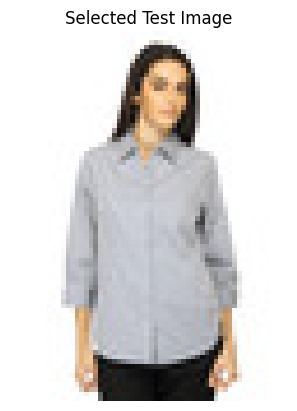

✅ Predicted Label: Topwear (Index: 0)
🖼️ Image Path: /content/test/32392.jpg


In [ ]:
import os
import random
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define image transformations (must match the ones used during training)
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Select a random image from test folder
test_image_folder = "/content/test"
test_images = os.listdir(test_image_folder)

if not test_images:
    raise FileNotFoundError("❌ Error: No images found in test dataset!")

# Pick a random test image
test_image_path = os.path.join(test_image_folder, random.choice(test_images))

# Load and preprocess the image
image = Image.open(test_image_path).convert("RGB")
image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# Display the selected image
plt.imshow(image)
plt.axis('off')
plt.title("Selected Test Image")
plt.show()

# Perform prediction
model.eval()
with torch.no_grad():
    output = model(image_tensor.to(device))
    predicted_label_idx = output.argmax(dim=1).item()

# Define category labels (ensure this matches the training labels)
class_labels = ["Topwear", "Bottomwear", "Innerwear", "Bags", "Watches", "Jewellery",
                "Eyewear", "Wallets", "Shoes", "Sandal", "Makeup", "Fragrance", "Other"]

# Get the predicted category name
predicted_label = class_labels[predicted_label_idx]

# Print results
print(f"✅ Predicted Label: {predicted_label} (Index: {predicted_label_idx})")
print(f"🖼️ Image Path: {test_image_path}")
